# Picture calculator

In [74]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

## Training number detector

In order to detect numbers in pictures, we will be using the MNIST dataset for training a neural network.
The neural network architecture and some of the code is from this Kaggle notebook: https://www.kaggle.com/cdeotte/25-million-images-0-99757-mnist

### Importing and preprocessing data

In [18]:
train = pd.read_csv("sample_data/mnist_train_small.csv")
test = pd.read_csv("sample_data/mnist_test.csv")

In [5]:
print("train data shape:", train.shape)
print("test data shape:", test.shape)

train data shape: (19999, 785)
test data shape: (9999, 785)


In [66]:
# PREPARE DATA FOR NEURAL NETWORK
Y_train = train["6"]
Y_test = test["7"]
X_train = train.drop(labels = ["6"],axis = 1)
X_train = X_train / 255.0
X_test = test.drop(labels = ["7"],axis = 1)
X_test = X_test / 255.0
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
Y_train = to_categorical(Y_train, num_classes = 10)

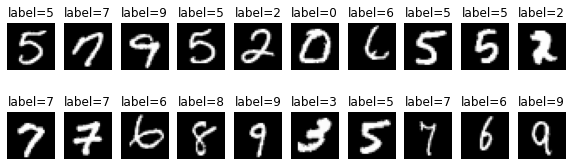

In [85]:
import matplotlib.pyplot as plt
# PREVIEW IMAGES
plt.figure(figsize=(10,3))
for i in range(20):  
    plt.subplot(2, 10, i+1)
    plt.title("label=%d" % train["6"][i])
    plt.imshow(X_train[i].reshape((28,28)),cmap="gray")
    plt.axis('off')
plt.show()

### Defining and training model

In [117]:
# BUILD CONVOLUTIONAL NEURAL NETWORK
model = Sequential()

model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size = 4, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

# COMPILE WITH ADAM OPTIMIZER AND CROSS ENTROPY COST
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# DECREASE LEARNING RATE EACH EPOCH
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
# TRAIN NETWORKS
epochs = 15
X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X_train, Y_train, test_size = 0.1)
history = model.fit(x=X_train2, y=Y_train2, epochs = epochs, steps_per_epoch = X_train2.shape[0]//64, 
                          validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=True)

In [118]:
# TRAIN NETWORKS
epochs = 15
X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X_train, Y_train, test_size = 0.1)
history = model.fit(x=X_train2, y=Y_train2, epochs = epochs, batch_size=64, steps_per_epoch = X_train2.shape[0]//64, 
                          validation_data = (X_val2,Y_val2), verbose=True)

Epoch 1/15
281/281 [==============================] - 66s 233ms/step - loss: 0.8875 - accuracy: 0.7352 - val_loss: 1.1027 - val_accuracy: 0.5860
Epoch 2/15
281/281 [==============================] - 66s 235ms/step - loss: 0.1305 - accuracy: 0.9595 - val_loss: 0.0848 - val_accuracy: 0.9745
Epoch 3/15
281/281 [==============================] - 66s 234ms/step - loss: 0.0732 - accuracy: 0.9780 - val_loss: 0.0612 - val_accuracy: 0.9835
Epoch 4/15
281/281 [==============================] - 66s 235ms/step - loss: 0.0687 - accuracy: 0.9781 - val_loss: 0.0613 - val_accuracy: 0.9800
Epoch 5/15
281/281 [==============================] - 66s 236ms/step - loss: 0.0601 - accuracy: 0.9823 - val_loss: 0.0430 - val_accuracy: 0.9870
Epoch 6/15
281/281 [==============================] - 66s 235ms/step - loss: 0.0475 - accuracy: 0.9849 - val_loss: 0.0424 - val_accuracy: 0.9870
Epoch 7/15
281/281 [==============================] - 66s 235ms/step - loss: 0.0465 - accuracy: 0.9857 - val_loss: 0.0547 - val_ac

TypeError: ignored

In [119]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions,axis = 1)

In [121]:
from sklearn.metrics import accuracy_score
accuracy_score(test["7"], results)

0.991899189918992

In [122]:
model.save('model')

INFO:tensorflow:Assets written to: model/assets


In [123]:
!zip -r /content/model.zip /content/model

updating: content/model/ (stored 0%)
updating: content/model/assets/ (stored 0%)
updating: content/model/saved_model.pb (deflated 91%)
updating: content/model/variables/ (stored 0%)
updating: content/model/variables/variables.data-00000-of-00001 (deflated 9%)
updating: content/model/variables/variables.index (deflated 75%)


In [124]:
from google.colab import files
files.download("/content/model.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>